In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [40]:
import tensorflow as tf
import os

In [41]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [43]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [80]:
import numpy as np
from matplotlib import pyplot as plt

In [81]:
data = tf.keras.utils.image_dataset_from_directory('resnet_50/img_balanc_v1')

Found 11736 files belonging to 7 classes.


In [82]:
data_iterator = data.as_numpy_iterator()

In [83]:
batch = data_iterator.next()

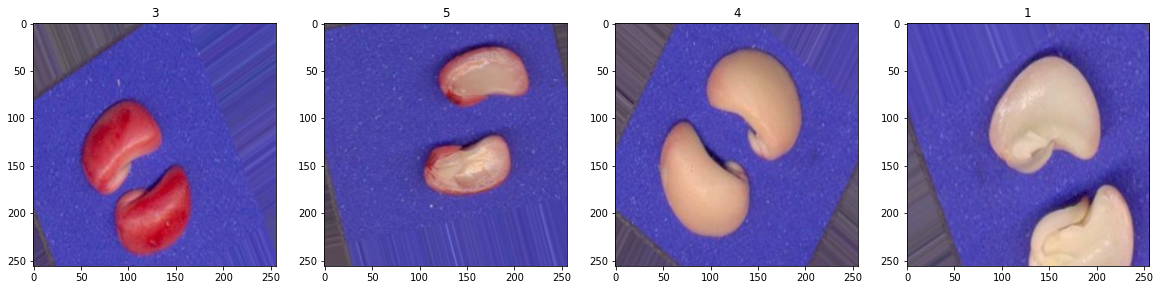

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [85]:
data = data.map(lambda x,y: (x/255, y))

In [86]:
data_dir = 'resnet_50/img_balanc_v1'

In [87]:
data.as_numpy_iterator().next()

(array([[[[3.1609768e-01, 3.0433297e-01, 7.1609765e-01],
          [3.1246817e-01, 3.0070347e-01, 7.1246815e-01],
          [3.1105012e-01, 2.9928541e-01, 7.1105009e-01],
          ...,
          [3.8211209e-01, 3.2583374e-01, 5.3169960e-01],
          [3.7434572e-01, 3.1573224e-01, 4.5394999e-01],
          [3.6695772e-01, 3.0813420e-01, 4.0200675e-01]],
 
         [[3.0287990e-01, 2.8842679e-01, 7.0108759e-01],
          [3.1362489e-01, 2.9917178e-01, 7.1183264e-01],
          [3.2474300e-01, 3.1028986e-01, 7.2295070e-01],
          ...,
          [4.0423900e-01, 3.5096082e-01, 5.6383955e-01],
          [3.9532781e-01, 3.3926165e-01, 4.7938317e-01],
          [3.8969600e-01, 3.3166361e-01, 4.2711839e-01]],
 
         [[3.0666050e-01, 2.8313109e-01, 6.9881737e-01],
          [3.0896738e-01, 2.8543797e-01, 7.0112425e-01],
          [3.1072676e-01, 2.8719735e-01, 7.0288360e-01],
          ...,
          [3.9656863e-01, 3.4565914e-01, 5.6580311e-01],
          [3.8943014e-01, 3.3485752e-

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [89]:
train_size

256

In [90]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [97]:
logdir='logs'

In [98]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
256/256 [==============================] - 168s 658ms/step - loss: -352998832209920.0000 - accuracy: 0.1949 - val_loss: -520807096778752.0000 - val_accuracy: 0.1914
Epoch 2/100
256/256 [==============================] - 67s 249ms/step - loss: -750088792047616.0000 - accuracy: 0.1956 - val_loss: -1042136032083968.0000 - val_accuracy: 0.1926
Epoch 3/100
256/256 [==============================] - 17s 65ms/step - loss: -1409652692615168.0000 - accuracy: 0.1962 - val_loss: -1883953447305216.0000 - val_accuracy: 0.1871
Epoch 4/100
256/256 [==============================] - 22s 84ms/step - loss: -2420809729572864.0000 - accuracy: 0.1970 - val_loss: -3121224406269952.0000 - val_accuracy: 0.1926
Epoch 5/100
256/256 [==============================] - 22s 86ms/step - loss: -3890003151159296.0000 - accuracy: 0.1957 - val_loss: -4904388795564032.0000 - val_accuracy: 0.1896
Epoch 6/100
256/256 [==============================] - 19s 75ms/step - loss: -5897824931676160.0000 - accuracy: 0.1

# 8. Plot Performance

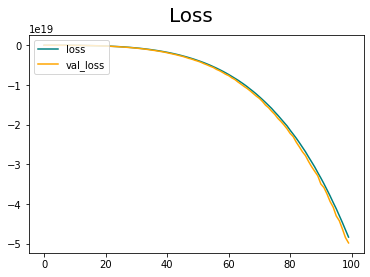

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

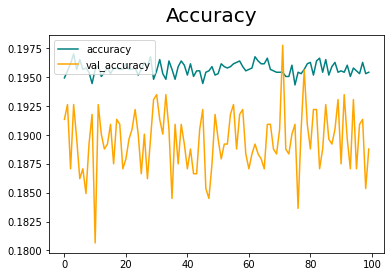

In [103]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('models\imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 177ms/step


array([[0.02711359]], dtype=float32)